## Partie 1 : Analyse graphique des données (EDA)

## Importation des bibliothèques nécessaires et du dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/Google-Playstore.csv')
df.info()
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')

#Ajout d'un thème
sns.set_theme()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

<ipython-input-2-62380921bb1f>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')


## Problématique : Quelles applications pourrait-on recommandés aux nouveaux utilisateurs de Google Play ?

Dans cette étude, nous allons voir les applications les mieux notés et les plus téléchargés.

<function matplotlib.pyplot.show(close=None, block=None)>

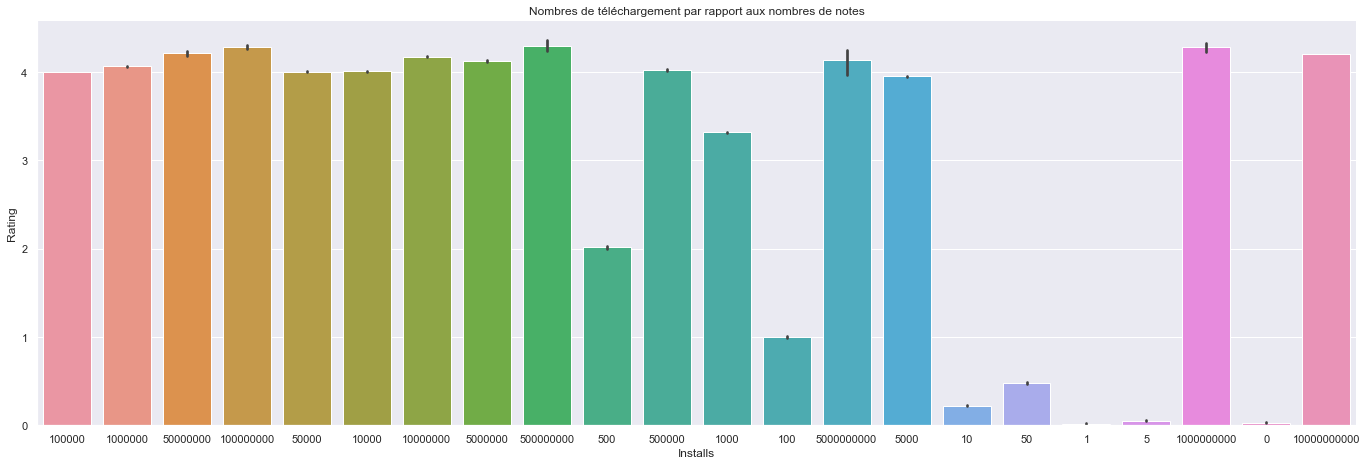

In [3]:
sns.catplot(x="Installs", y="Rating", data= df,kind="bar", height=10).fig.set_size_inches(20,6)
plt.title('Nombres de téléchargement par rapport aux nombres de notes')
plt.show

On observe que le nombres de téléchargements est assez basse quand la note des applications est inférieure à 3.

Text(0.5, 1.0, 'Boîte à moustaches')

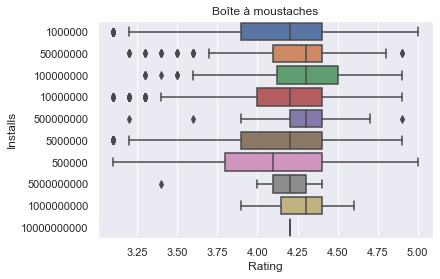

In [4]:
b = df["Rating"]
s = pd.to_numeric(df["Installs"])
sns.boxplot(x="Rating",y="Installs",data=df[(s > 100000) & (b > 3)])
plt.title('Boîte à moustaches')

Le nombre de téléchargements d'applications avec une note supérieure à 3.

## Matrice de corrélation du dataset

In [5]:
matrice = df.corr()
matrice

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
Rating,1.000000,0.016634,0.012691,0.014901,0.034812,-0.017595,0.095901,0.186133,0.023253
Rating Count,0.016634,1.000000,0.513602,0.559159,0.003427,-0.000969,0.002391,0.032644,0.150277
Minimum Installs,0.012691,0.513602,1.000000,0.946757,0.003121,-0.000873,-0.001397,0.014917,0.055936
Maximum Installs,0.014901,0.559159,0.946757,1.000000,0.003653,-0.001021,-0.001396,0.018039,0.066960
Free,0.034812,0.003427,0.003121,0.003653,1.000000,-0.277081,0.255407,0.030195,-0.000292
Price,-0.017595,-0.000969,-0.000873,-0.001021,-0.277081,1.000000,-0.070690,-0.009259,-0.000384
Ad Supported,0.095901,0.002391,-0.001397,-0.001396,0.255407,-0.070690,1.000000,0.082388,0.000178
In App Purchases,0.186133,0.032644,0.014917,0.018039,0.030195,-0.009259,0.082388,1.000000,0.057378
Editors Choice,0.023253,0.150277,0.055936,0.066960,-0.000292,-0.000384,0.000178,0.057378,1.000000


## Heatmap de la matrice de corrélation

Text(0.5, 1.0, 'Heatmap')

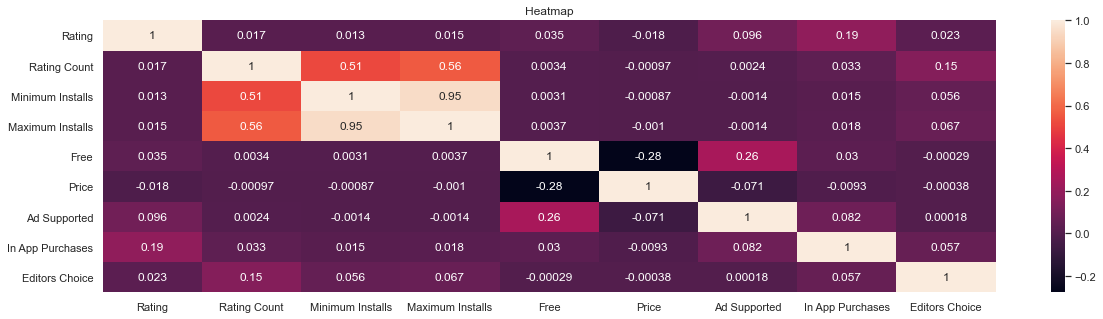

In [6]:
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(matrice, annot=True, ax =ax)
plt.title('Heatmap')

La heatmap nous permet de voir la corrélation et nous pouvons observer que les corrélations les plus fortes pour les applications sont leurs notes et leurs nombres de téléchargements.

## Partie 2: Model Building

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
columns = ['App Name','Category','Rating','Price','Installs']
X = df[columns[:-1]]
y = df[['Installs']]

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   App Name  1118135 non-null  object 
 1   Category  1118133 non-null  object 
 2   Rating    1111286 non-null  float64
 3   Price     1118136 non-null  float64
dtypes: float64(2), object(2)
memory usage: 34.1+ MB


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 1 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Installs  1117975 non-null  object
dtypes: object(1)
memory usage: 8.5+ MB


On trie le dataset avec les colonnes qui nous intéressent.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((782695, 4), (335441, 4), (782695, 1), (335441, 1))